In [1]:
# This code was created with the assistance of ChatGPT, an AI language model by OpenAI

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

import qiskit

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator

#Importing important libraries such as Qiskit itself, and the functions within Qiskit
#matplotlib is used to plot our results of the simulations

#Qiskit Aer Simulator is a way to simulate quantum circuits and measure their results

Results for q2 in Hadamard superposition (Proportions):


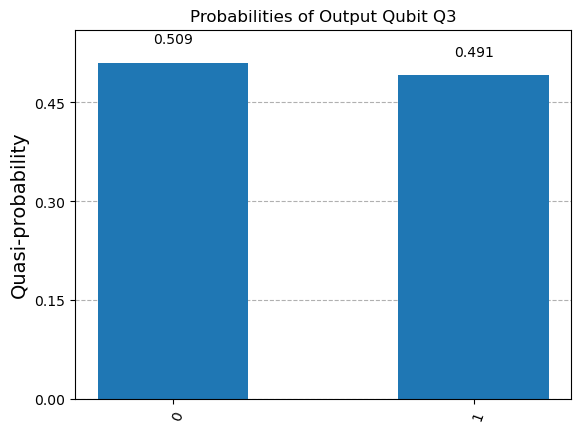

In [9]:
from qiskit.visualization import plot_histogram
#modules to visualize the results from the Qiskit simulations

# Function to set q0 to 1, apply a Hadamard on q2, and simulate the circuit
def run_hadamard_simulation():
    # Create a quantum circuit with 4 qubits and 1 classical bit
    qc = QuantumCircuit(4, 1)

    qc.x(0)  # Initialize q0 to 1 (selector qubit is set to 1), Flip q0 to 1


    qc.h(2)     # Apply Hadamard gate to qubit 2 (put q2 in superposition)

    # Apply the gates
    qc.cx(1, 3)           # CX from q1 to q3
    qc.ccx(0, 1, 3)       # Toffoli gate from q0 and q1 to q3
    qc.ccx(0, 2, 3)       # Toffoli gate from q0 and q2 to q3


    qc.measure(3, 0)     # Measure q3 into classical bit

    # Use the AerSimulator to simulate the quantum circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=10000).result()  # Run 10000 circuit measurements
    counts = result.get_counts(qc)
    return counts

# Run the simulation with q0 = 1 (selector) and qubit 2 in superposition
counts_q2_hadamard = run_hadamard_simulation()

# Normalize the counts to get proportions
def normalize_counts(counts):
    total_counts = sum(counts.values())
    proportions = {key: val / total_counts for key, val in counts.items()}
    return proportions

# Normalize the results to show proportions instead of counts
proportions_q2_hadamard = normalize_counts(counts_q2_hadamard)

# Plot the proportions of measuring 0 or 1 in q3 for q2 in superposition
print("Results for q2 in Hadamard superposition (Proportions):")

plot_histogram(proportions_q2_hadamard, title = 'Probabilities of Output Qubit Q3') 
